**IMPORTING ALL NECESSARY LIBRARIES**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

**LOADING THE DATA**

In [2]:
df=pd.read_csv('Leads.csv')

In [3]:
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


## First we will analyze the data in detail

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

We see above that majority of the columns are categorical.

Checking the null values

In [5]:
df.isnull().sum()

,0
Prospect ID,0
Lead Number,0
Lead Origin,0
Lead Source,36
Do Not Email,0
Do Not Call,0
Converted,0
TotalVisits,137
Total Time Spent on Website,0
Page Views Per Visit,137


In [6]:
df.shape

(9240, 37)

In [7]:
# Checking null values in percentage.
 (df.isnull().sum()/df.shape[0])*100

,0
Prospect ID,0.000000
Lead Number,0.000000
Lead Origin,0.000000
Lead Source,0.389610
Do Not Email,0.000000
Do Not Call,0.000000
Converted,0.000000
TotalVisits,1.482684
Total Time Spent on Website,0.000000
Page Views Per Visit,1.482684


There are many categorical columns where values are not selected, so they appear as 'select' by default. We will treat them as null values and change them to null values as instructed in problem statement.

In [8]:
#replacing select with null values
df.replace('Select',np.nan,inplace=True)

In [9]:
# We see that for many variables null value count has increased.
 (df.isnull().sum()/df.shape[0])*100

,0
Prospect ID,0.000000
Lead Number,0.000000
Lead Origin,0.000000
Lead Source,0.389610
Do Not Email,0.000000
Do Not Call,0.000000
Converted,0.000000
TotalVisits,1.482684
Total Time Spent on Website,0.000000
Page Views Per Visit,1.482684


## Now we will proceed to clean the data

In [10]:
# Finding columns having missing values more than 40%
missing_columns=df.columns[((df.isnull().sum()/df.shape[0])*100)>40]


In [11]:
missing_columns

Index(['How did you hear about X Education', 'Lead Quality', 'Lead Profile',
       'Asymmetrique Activity Index', 'Asymmetrique Profile Index',
       'Asymmetrique Activity Score', 'Asymmetrique Profile Score'],
      dtype='object')

In [12]:
# dropping columns having missing values more than 40%
df.drop(missing_columns,axis=1,inplace=True)

In [13]:
(df.isnull().sum()/df.shape[0])*100

,0
Prospect ID,0.000000
Lead Number,0.000000
Lead Origin,0.000000
Lead Source,0.389610
Do Not Email,0.000000
Do Not Call,0.000000
Converted,0.000000
TotalVisits,1.482684
Total Time Spent on Website,0.000000
Page Views Per Visit,1.482684


In [14]:
# checking unique values and their counts in each column.
for column in ['Lead Source', 'TotalVisits','Page Views Per Visit','Last Activity','Country','Specialization','What is your current occupation','What matters most to you in choosing a course','Tags','City']:
    print(f"Value counts for {column}:")
    print(df[column].value_counts())
    print("\n")

Value counts for Lead Source:
Lead Source
Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
youtubechannel          1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: count, dtype: int64


Value counts for TotalVisits:
TotalVisits
0.0      2189
2.0      1680
3.0      1306
4.0      1120
5.0       783
6.0       466
1.0       395
7.0       309
8.0       224
9.0       164
10.0      114
11.0       86
13.0       48
12.0       45
14.0       36
16.0       21
15.0       18
17.0       16
18.0       15
20.0       12
19.0        9
21.0        6
23.0        6
24.0        5
25.0  

Treating null values

In [15]:
# Filling null values in categorical columns with 'unknown', as we cannot impute any other values in these columns.
df[['Lead Source','Last Activity','Country','Specialization','What is your current occupation','Tags','City']] = df[['Lead Source','Last Activity','Country','Specialization','What is your current occupation','Tags','City']].fillna('unknown')

In [16]:
# Replacing null values in these columns with mode as that is best choice to impute in this case.
for col in ['TotalVisits','Page Views Per Visit','What matters most to you in choosing a course']:
    df[col] = df[col].fillna(df[col].mode()[0])

In [17]:
(df.isnull().sum()/df.shape[0])*100

,0
Prospect ID,0.0
Lead Number,0.0
Lead Origin,0.0
Lead Source,0.0
Do Not Email,0.0
Do Not Call,0.0
Converted,0.0
TotalVisits,0.0
Total Time Spent on Website,0.0
Page Views Per Visit,0.0


In [ ]:
# Now we have the data with 0 null values on which we can work.

In [18]:
# Analyzing more columns
for column in df.columns:
    print(f"Value counts for {column}:")
    print(df[column].value_counts())
    print("\n")

Value counts for Prospect ID:
Prospect ID
7927b2df-8bba-4d29-b9a2-b6e0beafe620    1
22e9d4ef-d294-4ebf-81c7-7c7a1105aeea    1
46befc49-253a-419b-abea-2fd978d2e2b1    1
9d35a2c2-09d8-439f-9875-0e8bbf267f5a    1
f0de9371-4dc2-48c2-9785-a08d6fc4fcb5    1
                                       ..
ff1f7582-cb7b-4b94-9cdc-3d0d0afdd9a3    1
644099a2-3da4-4d23-9546-7676340a372b    1
2a093175-415b-4321-9e69-ed8d9df65a3c    1
c66249a3-8500-4c66-a511-312d914573de    1
571b5c8e-a5b2-4d57-8574-f2ffb06fdeff    1
Name: count, Length: 9240, dtype: int64


Value counts for Lead Number:
Lead Number
660737    1
603303    1
602561    1
602557    1
602540    1
         ..
630422    1
630405    1
630403    1
630390    1
579533    1
Name: count, Length: 9240, dtype: int64


Value counts for Lead Origin:
Lead Origin
Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: count, dtype: int64


Value co

In [19]:
# dropping these columns because of imbalanced class distribution.
df=df.drop(['Newspaper Article','X Education Forums','Digital Advertisement','Through Recommendations','Get updates on DM Content','Newspaper','Magazine','Search','Do Not Call','What matters most to you in choosing a course','Receive More Updates About Our Courses','Update me on Supply Chain Content','I agree to pay the amount through cheque'],axis=1)

In [20]:
# dropping useless columns
df=df.drop(['Prospect ID','Lead Number'],axis=1)

## Now we have the cleaned data. We will do some exploratory data analysis.

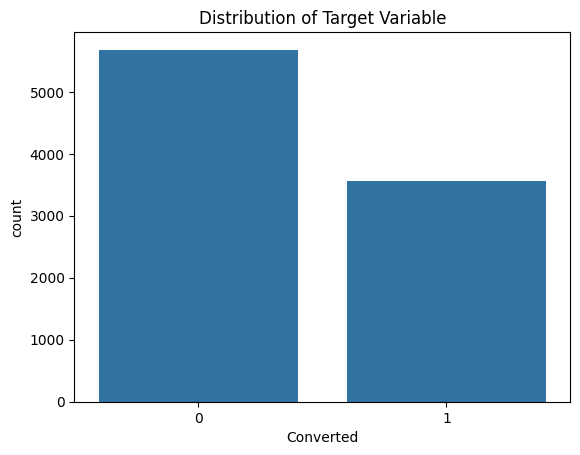

In [21]:
sns.countplot(x='Converted', data=df)
plt.title('Distribution of Target Variable')
plt.show()

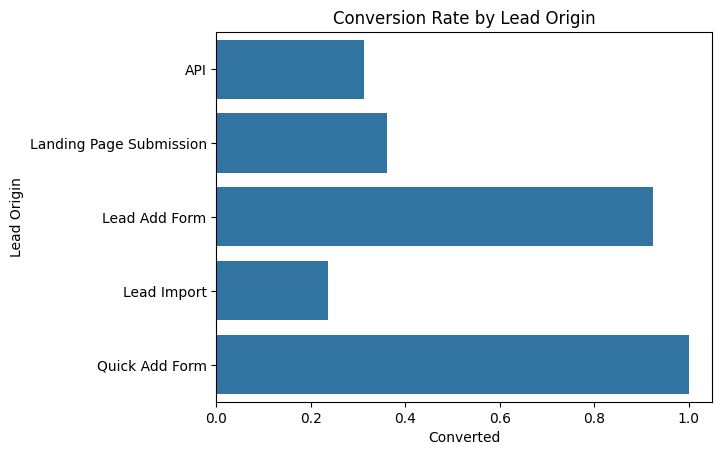

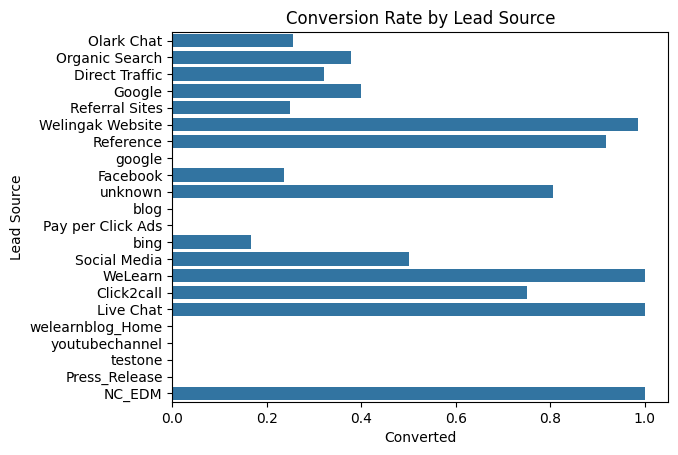

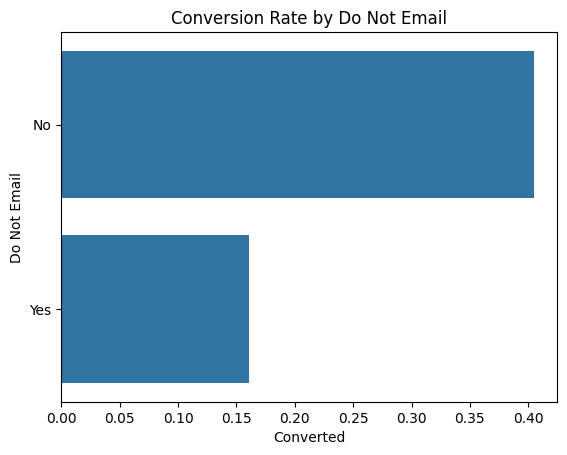

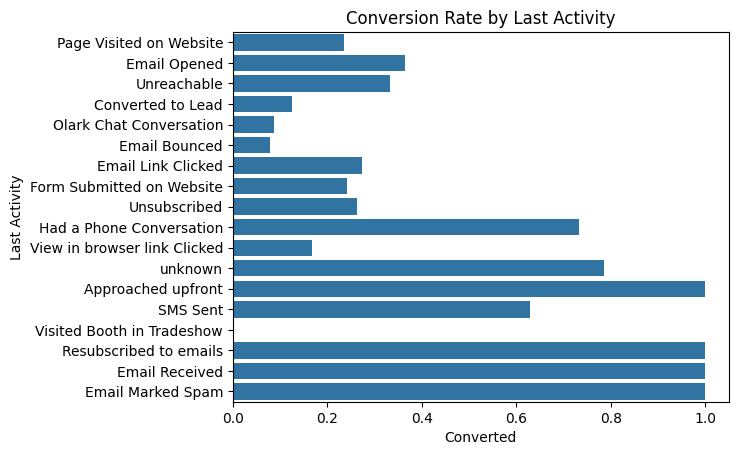

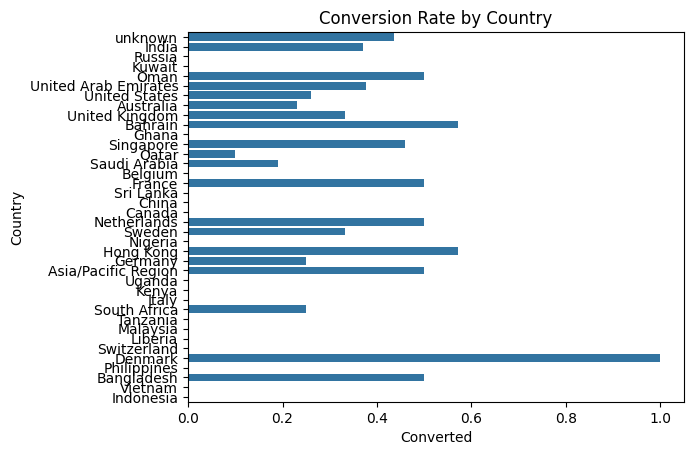

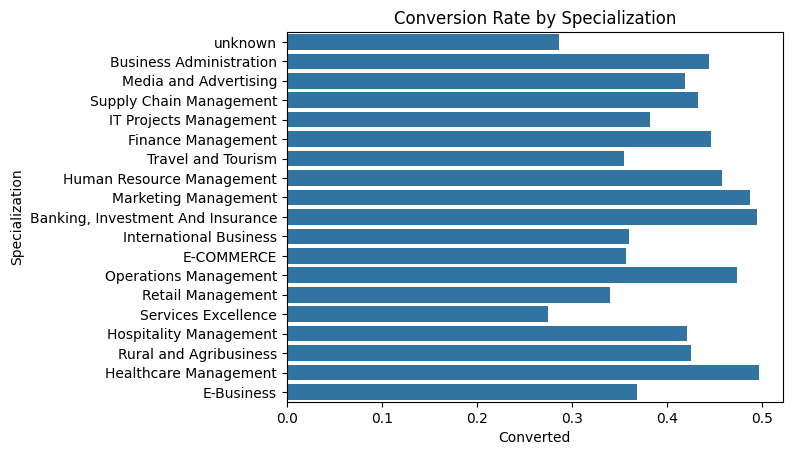

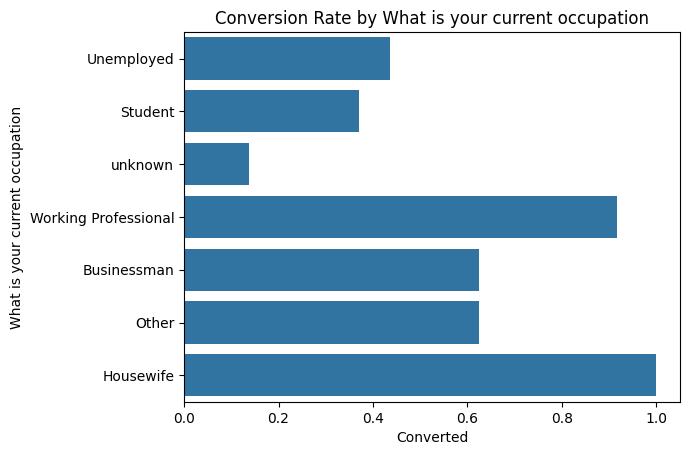

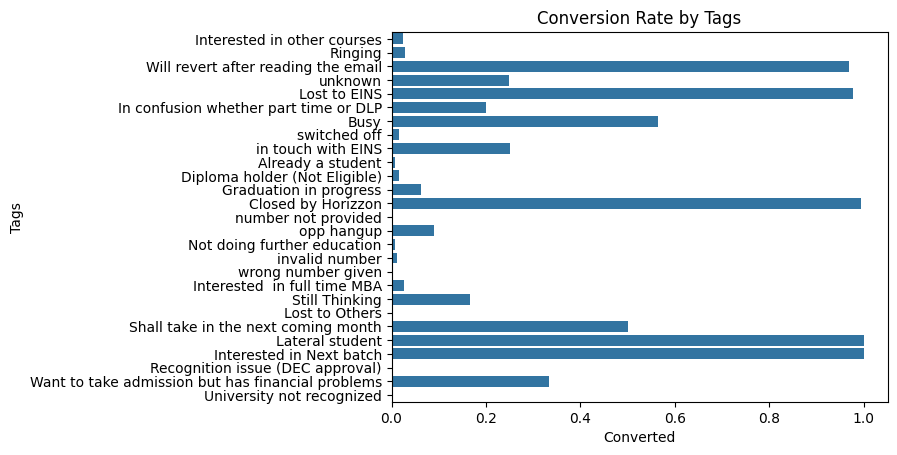

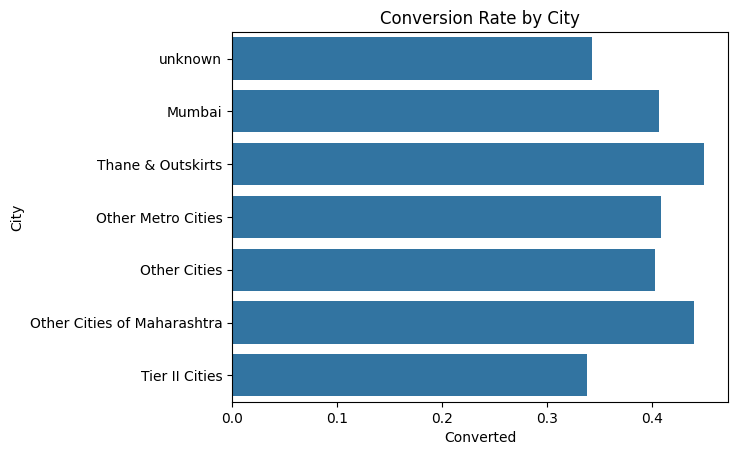

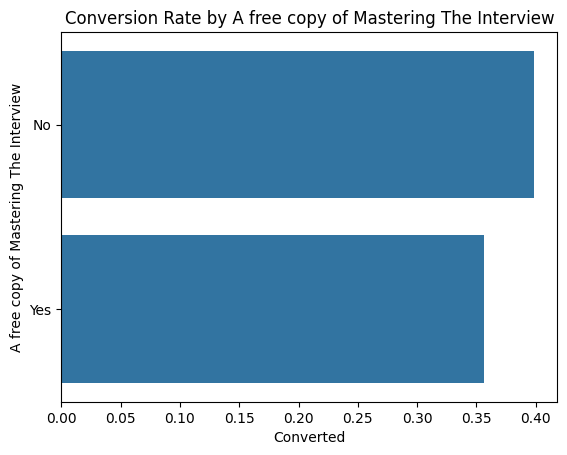

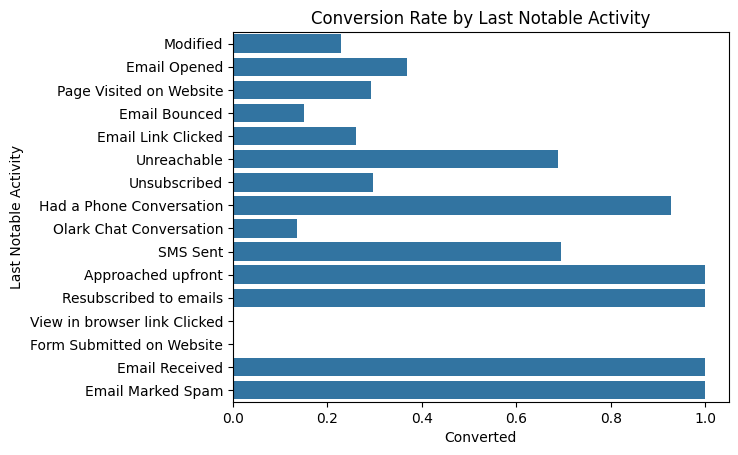

In [22]:
for col in df.select_dtypes(include='object').columns:
    sns.barplot(x='Converted', y=col, data=df, ci=None)
    plt.title(f"Conversion Rate by {col}")
    plt.show()

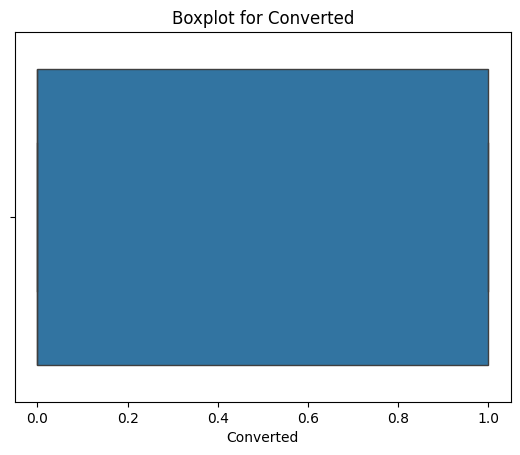

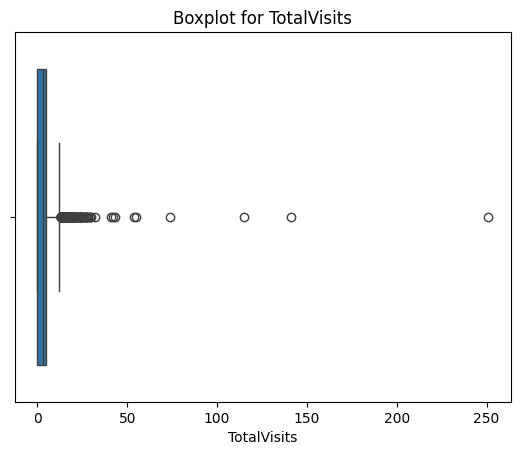

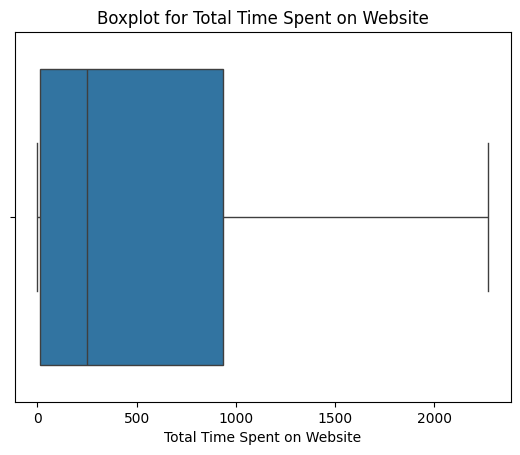

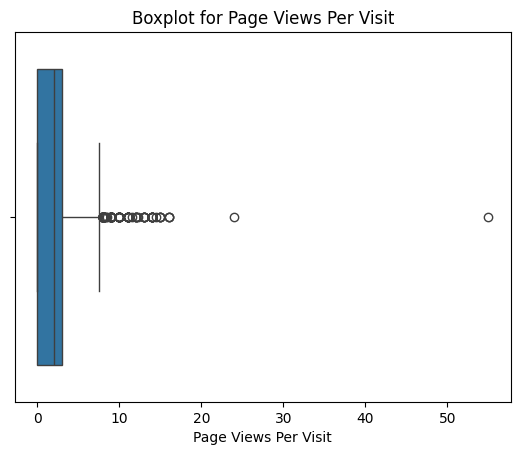

In [23]:
for col in df.select_dtypes(include=['int64', 'float64']).columns:
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot for {col}")
    plt.show()

We will clean the data again after EDA by imputing outliers.

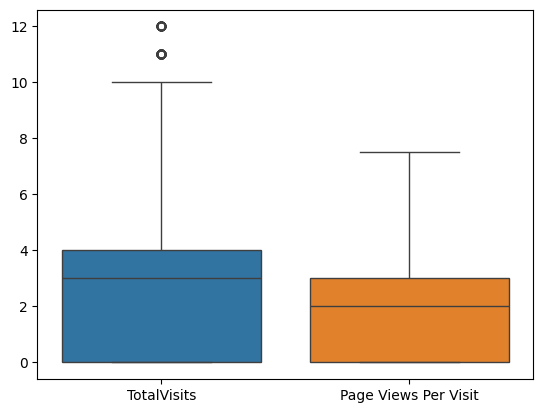

In [24]:
# imputing outliers to lowerbound or upperbound

outlier_columns = ['TotalVisits', 'Page Views Per Visit']

# Calculate IQR for each numerical column in outlier_columns
Q1 = df[outlier_columns].quantile(0.25)
Q3 = df[outlier_columns].quantile(0.75)
IQR = Q3 - Q1

# Define the bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Impute outliers with the median of the column
for col in outlier_columns:
    # Replace values below lower bound with the median
    df[col] = np.where(df[col] < lower_bound[col], df[col].median(), df[col])
    # Replace values above upper bound with the median
    df[col] = np.where(df[col] > upper_bound[col], df[col].median(), df[col])

# Plot boxplot for cleaned data (after outlier removal)
sns.boxplot(data=df[outlier_columns])
plt.show()

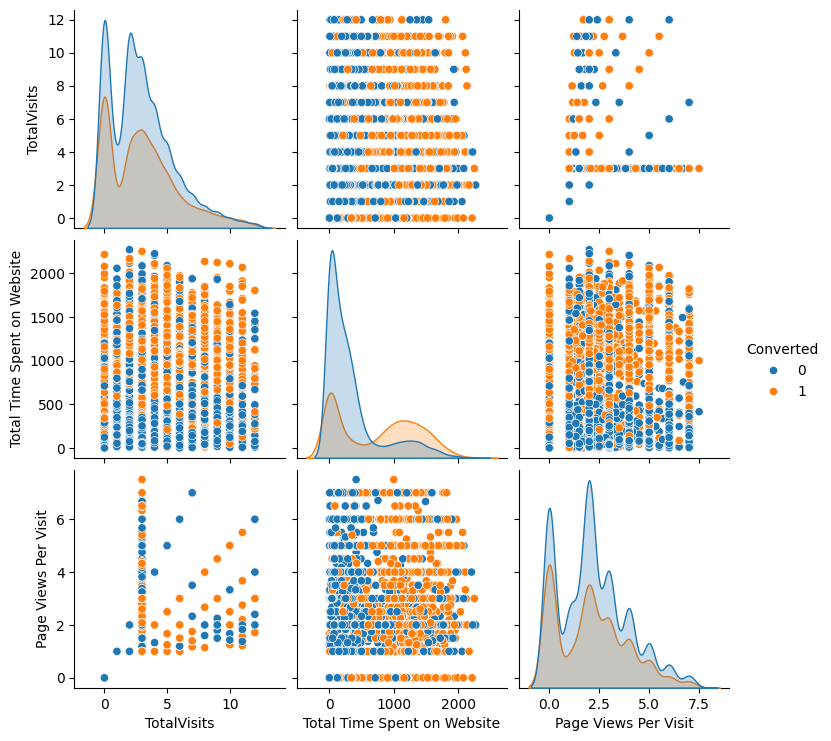

In [25]:
# Checking relationship between all variables.
sns.pairplot(df, hue='Converted')
plt.show()

Now we will proceed to prepare the data for fitting it into the model

In [26]:
# Identifying all object type variables.
cat_cols=df.loc[:,df.dtypes=='object']
cat_cols.columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity',
       'Country', 'Specialization', 'What is your current occupation', 'Tags',
       'City', 'A free copy of Mastering The Interview',
       'Last Notable Activity'],
      dtype='object')

In [27]:
# Label encoding - necessary for correct performance of model.
from sklearn import preprocessing
label_encoder=preprocessing.LabelEncoder()
for i in cat_cols:
  df[i]=label_encoder.fit_transform(df[i])


In [28]:
df.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,What is your current occupation,Tags,City,A free copy of Mastering The Interview,Last Notable Activity
0,0,6,0,0,0.0,0,0.0,10,37,18,4,8,6,0,8
1,0,7,0,0,5.0,674,2.5,5,12,18,4,14,6,0,4
2,1,1,0,1,2.0,1532,2.0,5,12,1,3,19,0,1,4
3,1,1,0,0,1.0,305,1.0,13,12,11,4,14,0,0,8
4,1,3,0,1,2.0,1428,1.0,1,12,18,4,19,0,0,8


In [29]:
# Checking if any variables are correlated to each other.
df.corr()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,What is your current occupation,Tags,City,A free copy of Mastering The Interview,Last Notable Activity
Lead Origin,1.000000,0.087178,0.053296,0.223725,0.074253,0.088852,0.118992,0.108448,-0.049152,-0.453914,-0.182637,-0.139234,-0.477197,0.276458,0.049143
Lead Source,0.087178,1.000000,-0.034671,0.180551,-0.288952,-0.233877,-0.349447,0.117266,0.547627,0.294007,-0.014401,0.037888,0.399130,-0.353845,0.053495
Do Not Email,0.053296,-0.034671,1.000000,-0.135580,-0.010574,-0.046374,0.010406,-0.038383,-0.033553,-0.011330,0.034835,0.046283,-0.044649,0.055762,0.092492
Converted,0.223725,0.180551,-0.135580,1.000000,0.029297,0.362483,-0.017873,0.247075,0.055842,-0.135032,-0.231565,0.018440,-0.056454,-0.039820,0.210445
TotalVisits,0.074253,-0.288952,-0.010574,0.029297,1.000000,0.339413,0.702596,0.027974,-0.628109,-0.319335,-0.057249,-0.031994,-0.398577,0.291973,-0.020650
Total Time Spent on Website,0.088852,-0.233877,-0.046374,0.362483,0.339413,1.000000,0.339611,0.086314,-0.426426,-0.225480,-0.119172,-0.037350,-0.255431,0.168298,0.071844
Page Views Per Visit,0.118992,-0.349447,0.010406,-0.017873,0.702596,0.339611,1.000000,0.021827,-0.680485,-0.352978,-0.073929,-0.033604,-0.442110,0.290140,-0.002394
Last Activity,0.108448,0.117266,-0.038383,0.247075,0.027974,0.086314,0.021827,1.000000,0.085763,-0.003123,-0.042727,0.082346,0.028405,-0.038559,0.725612
Country,-0.049152,0.547627,-0.033553,0.055842,-0.628109,-0.426426,-0.680485,0.085763,1.000000,0.375689,0.079041,0.063576,0.471332,-0.363112,0.010117
Specialization,-0.453914,0.294007,-0.011330,-0.135032,-0.319335,-0.225480,-0.352978,-0.003123,0.375689,1.000000,0.136077,0.120443,0.620748,-0.377987,-0.007125


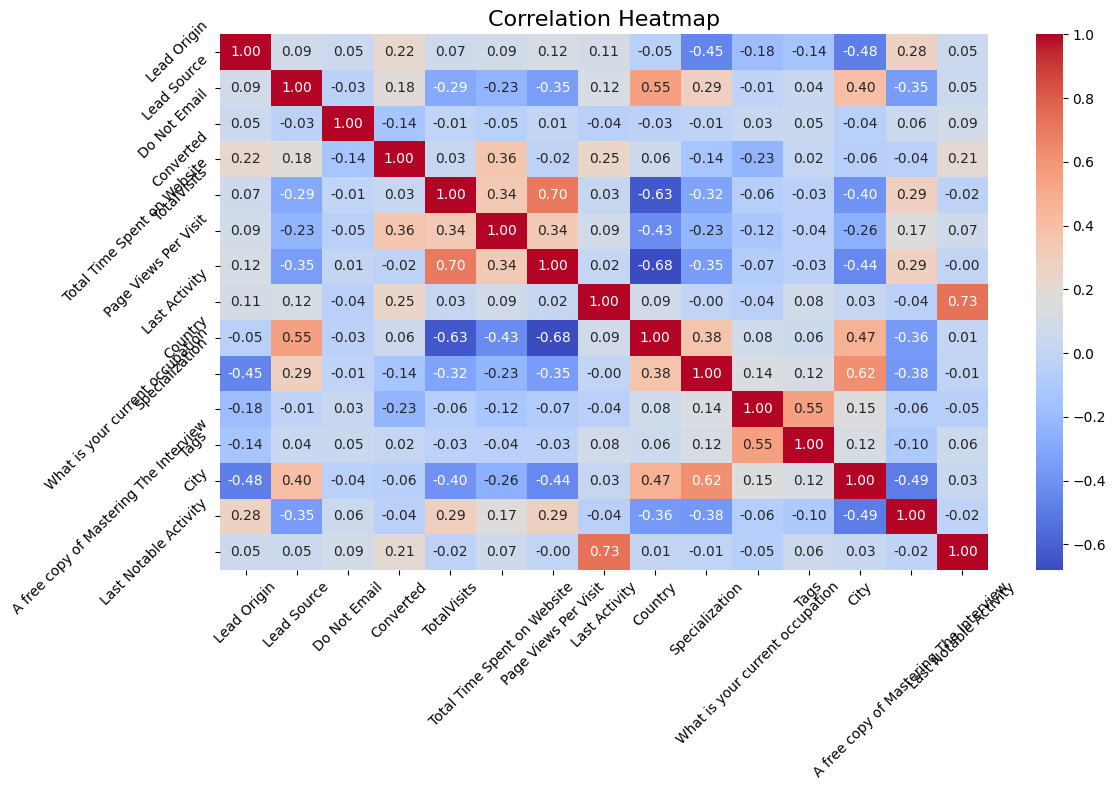

In [30]:
correlation_matrix = df.corr()

# Create the heatmap
plt.figure(figsize=(12, 8))  # Adjust figure size if needed
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)

# Add labels and title
plt.title("Correlation Heatmap", fontsize=16)
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.tight_layout()
plt.show()

Creating X and Y datasets to proceed with training the data on model

In [31]:
x=df.drop(['Converted'],axis=1)
y=df['Converted']

In [32]:
# splitting data into training and testing sets
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.7,random_state=0)


In [33]:
columns = x_train.columns

In [34]:
# Scaling data to a fixed range, between 0 and 1. This ensures that all features contribute equally to the model and reduce the impact of features with larger magnitudes.

from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.fit_transform(x_test)


In [35]:
# Converting back into pandas dataframe
x_train=pd.DataFrame(x_train, columns=columns)

In [36]:
x_train.head()

,Lead Origin,Lead Source,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,What is your current occupation,Tags,City,A free copy of Mastering The Interview,Last Notable Activity
0,0.333333,0.000000,0.0,0.166667,0.148247,0.285714,0.294118,0.945946,0.388889,0.666667,0.538462,0.5,0.0,0.214286
1,0.333333,0.111111,0.0,0.416667,0.567244,0.357143,0.705882,0.324324,0.000000,1.000000,0.961538,0.0,0.0,0.500000
2,0.333333,0.000000,0.0,0.666667,0.079006,0.571429,0.294118,0.324324,0.000000,0.500000,0.730769,0.0,1.0,0.214286
3,0.000000,0.111111,0.0,0.583333,0.676431,0.200000,0.294118,0.324324,0.722222,0.666667,0.730769,0.0,0.0,0.214286
4,0.000000,0.111111,0.0,0.333333,0.037284,0.571429,0.705882,0.324324,0.055556,0.666667,0.538462,0.0,0.0,0.785714


Running the model

In [37]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression()

In [38]:
# Recursive feature elimination to select top most contributing variables
from sklearn.feature_selection import RFE
rfe=RFE (estimator=model,n_features_to_select=15)
rfe=rfe.fit(x_train,y_train)

In [39]:
# Lets see which features are selected
list(zip(x_train.columns,rfe.support_,rfe.ranking_))

[('Lead Origin', True, 1),
 ('Lead Source', True, 1),
 ('Do Not Email', True, 1),
 ('TotalVisits', True, 1),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', True, 1),
 ('Last Activity', True, 1),
 ('Country', True, 1),
 ('Specialization', True, 1),
 ('What is your current occupation', True, 1),
 ('Tags', True, 1),
 ('City', True, 1),
 ('A free copy of Mastering The Interview', True, 1),
 ('Last Notable Activity', True, 1)]

In [40]:
# assigning ranks to most contributing variables.
from operator import itemgetter
features = x_train.columns.to_list()
for x,y in (sorted(zip(rfe.ranking_,features),key=itemgetter(0))):
  print(x,y)

1 Lead Origin
1 Lead Source
1 Do Not Email
1 TotalVisits
1 Total Time Spent on Website
1 Page Views Per Visit
1 Last Activity
1 Country
1 Specialization
1 What is your current occupation
1 Tags
1 City
1 A free copy of Mastering The Interview
1 Last Notable Activity


In [41]:
# select only those columns which have been selected by RFE
col=x_train.columns[rfe.support_]

In [42]:
x_train=x_train[col]

In [43]:
x_train.shape

(2772, 14)

In [44]:
# fit a logistic regression model on x_train after adding a constant and output the summary

In [45]:
import statsmodels.api as sm

In [46]:

# Ensuring x_train and y_train have matching indices
x_train, y_train = x_train.align(y_train, join='inner', axis=0)

# Adding constant to the independent variables
x_train_sm = sm.add_constant(x_train)

logm2=sm.GLM(y_train,x_train_sm,family=sm.families.Binomial())
res=logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                  827
Model:                            GLM   Df Residuals:                      812
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -538.57
Date:                Tue, 28 Jan 2025   Deviance:                       1077.1
Time:                        17:07:22   Pearson chi2:                     826.
No. Iterations:                     4   Pseudo R-squ. (CS):            0.02387
Covariance Type:            nonrobust                                         
==========================================================================================================
                                             coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
const                                     -0.0393      0.564     -0.070      0.944      -1.144       1.065
Lead Origin                               -0.1879      0.448     -0.419      0.675      -1.067       0.691
Lead Source                                0.2410      0.533      0.452      0.651      -0.804       1.286
Do Not Email                              -0.4159      0.296     -1.403      0.161      -0.997       0.165
TotalVisits                               -0.5478      0.554     -0.989      0.323      -1.634       0.538
Total Time Spent on Website               -0.2457      0.350     -0.702      0.483      -0.932       0.440
Page Views Per Visit                       0.3161      0.475      0.666      0.506      -0.615       1.247
Last Activity                              0.7364      0.491      1.500      0.134      -0.226       1.698
Country                                   -0.5468      0.393     -1.392      0.164      -1.317       0.223
Specialization                            -0.5036      0.293     -1.720      0.086      -1.078       0.070
What is your current occupation            0.0565      0.548      0.103      0.918      -1.017       1.130
Tags                                       0.0792      0.287      0.276      0.782      -0.483       0.641
City                                       0.5326      0.249      2.139      0.032       0.045       1.021
A free copy of Mastering The Interview    -0.2591      0.195     -1.329      0.184      -0.641       0.123
Last Notable Activity                     -0.7832      0.483     -1.622      0.105      -1.730       0.163
==========================================================================================================
"""

In [47]:
# calculate VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [48]:
vif=pd.DataFrame()
vif['Features']=x_train.columns
vif['VIF']=[variance_inflation_factor(x_train.values,i) for i in range(x_train.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
9,What is your current occupation,21.36
6,Last Activity,11.18
13,Last Notable Activity,11.06
7,Country,8.62
10,Tags,8.44
8,Specialization,7.67
5,Page Views Per Visit,6.00
11,City,5.39
3,TotalVisits,5.32
1,Lead Source,3.51


In [49]:
y_pred = model.predict(x_test)
y_pred_proba = model.predict_proba(x_test)[:, 1]

In [50]:
y_train_pred=res.predict(sm.add_constant(x_train))
y_train_pred[:10]

,0
0,0.387670
13,0.411118
19,0.440693
21,0.316875
25,0.426081
26,0.364379
27,0.379960
28,0.324747
35,0.416822
40,0.436710


In [51]:
# Plotting confusion matrix
from sklearn.metrics import confusion_matrix

In [52]:
predictions = rfe.predict(x_test)
confusion_matrix(y_test,predictions)

array([[3379,  574],
       [ 865, 1650]])

In [ ]:
# above - 3379 is True negative, 574 is false positive, 865 is false negative and 1650 is true positive.

# 574 leads were thought to get converted but actually they didn't.
# 865 leads would have been converted if contacted, but model predicted wrongly that they wouldn't be converted.
# 1650 leads is the number the model predicted would convert, and they actually did.

In [53]:
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
)

In [54]:
accuracy = accuracy_score(y_test, predictions)
precision = precision_score(y_test, predictions)
recall = recall_score(y_test, predictions)
f1 = f1_score(y_test, predictions)
roc_auc = roc_auc_score(y_test, predictions)

In [55]:
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
print(f"ROC AUC Score: {roc_auc:.2f}")

Accuracy: 0.78
Precision: 0.74
Recall: 0.66
F1 Score: 0.70
ROC AUC Score: 0.76


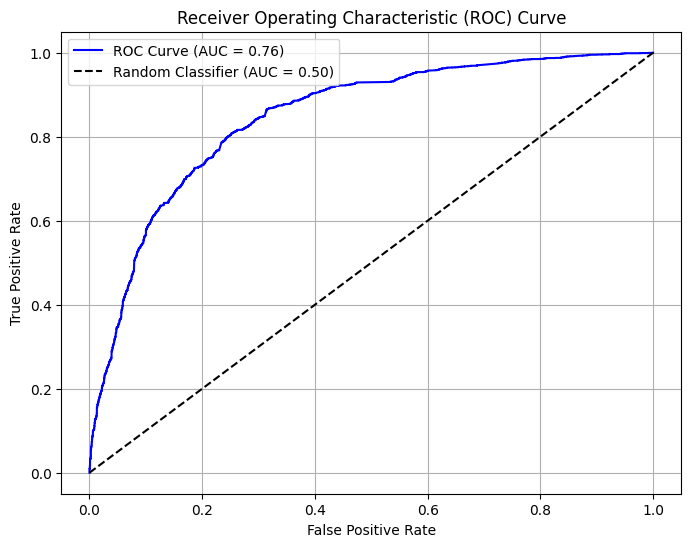

In [56]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.2f})", color="blue")
plt.plot([0, 1], [0, 1], "k--", label="Random Classifier (AUC = 0.50)")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.legend()
plt.grid(True)
plt.show()

In [57]:
lead_scores = y_pred_proba * 100  # Scale probabilities to a range of 0–100
lead_score_df = pd.DataFrame({'Lead Score': lead_scores, 'Converted': y_test})
print("\nSample Lead Scores:")
print(lead_score_df.head())


Sample Lead Scores:
      Lead Score  Converted
2212   69.395798          0
3034   91.050464          1
4492   61.065332          0
5063   25.645483          0
7645   19.610222          0


In [58]:
lead_score_df = lead_score_df.sort_values(by='Lead Score', ascending=False)
lead_score_df.head()

,Lead Score,Converted
6565,99.629640,1
2601,99.609875,1
6712,99.487190,1
3032,99.484481,1
7126,99.195223,1


In [59]:
# Calculate conversion rate at different thresholds
thresholds = [50, 60, 66, 70, 80, 90]
for threshold in thresholds:
    filtered_leads = lead_score_df[lead_score_df['Lead Score'] > threshold]
    conversion_rate = filtered_leads['Converted'].mean() * 100
    print(f"Threshold: {threshold}, Conversion Rate: {conversion_rate:.2f}%")


Threshold: 50, Conversion Rate: 74.19%
Threshold: 60, Conversion Rate: 78.88%
Threshold: 66, Conversion Rate: 79.83%
Threshold: 70, Conversion Rate: 81.27%
Threshold: 80, Conversion Rate: 83.01%
Threshold: 90, Conversion Rate: 90.46%


### ITERATING TO IMPROVE MODEL PERFORMANCE

In [60]:
df1=df.drop('What is your current occupation',axis=1)

In [61]:
df1=df.drop('Tags',axis=1)

In [62]:
x=df1.drop(['Converted'],axis=1)
y=df1['Converted']

In [63]:
# splitting data into training and testing sets
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.7,random_state=0)

In [64]:
columns = x_train.columns

In [65]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.fit_transform(x_test)

In [66]:
x_train=pd.DataFrame(x_train, columns=columns)

In [67]:
x_train.head()

,Lead Origin,Lead Source,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,What is your current occupation,City,A free copy of Mastering The Interview,Last Notable Activity
0,0.333333,0.000000,0.0,0.166667,0.148247,0.285714,0.294118,0.945946,0.388889,0.666667,0.5,0.0,0.214286
1,0.333333,0.111111,0.0,0.416667,0.567244,0.357143,0.705882,0.324324,0.000000,1.000000,0.0,0.0,0.500000
2,0.333333,0.000000,0.0,0.666667,0.079006,0.571429,0.294118,0.324324,0.000000,0.500000,0.0,1.0,0.214286
3,0.000000,0.111111,0.0,0.583333,0.676431,0.200000,0.294118,0.324324,0.722222,0.666667,0.0,0.0,0.214286
4,0.000000,0.111111,0.0,0.333333,0.037284,0.571429,0.705882,0.324324,0.055556,0.666667,0.0,0.0,0.785714


In [68]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression()

In [69]:
from sklearn.feature_selection import RFE
rfe=RFE (estimator=model,n_features_to_select=15)
rfe=rfe.fit(x_train,y_train)


In [70]:
# Lets see which features are selected
list(zip(x_train.columns,rfe.support_,rfe.ranking_))

[('Lead Origin', True, 1),
 ('Lead Source', True, 1),
 ('Do Not Email', True, 1),
 ('TotalVisits', True, 1),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', True, 1),
 ('Last Activity', True, 1),
 ('Country', True, 1),
 ('Specialization', True, 1),
 ('What is your current occupation', True, 1),
 ('City', True, 1),
 ('A free copy of Mastering The Interview', True, 1),
 ('Last Notable Activity', True, 1)]

In [71]:
from operator import itemgetter
features = x_train.columns.to_list()
for x,y in (sorted(zip(rfe.ranking_,features),key=itemgetter(0))):
  print(x,y)

1 Lead Origin
1 Lead Source
1 Do Not Email
1 TotalVisits
1 Total Time Spent on Website
1 Page Views Per Visit
1 Last Activity
1 Country
1 Specialization
1 What is your current occupation
1 City
1 A free copy of Mastering The Interview
1 Last Notable Activity


In [72]:
# select only those columns which have been selected by RFE
col=x_train.columns[rfe.support_]

In [73]:
x_train=x_train[col]

In [74]:
x_train.shape

(2772, 13)

In [75]:
# fit a logistic regression model on x_train after adding a constant and output the summary
import statsmodels.api as sm

In [76]:
# Ensuring x_train and y_train have matching indices
x_train, y_train = x_train.align(y_train, join='inner', axis=0)
# Adding constant to the independent variables
x_train_sm = sm.add_constant(x_train)

In [77]:
logm2=sm.GLM(y_train,x_train_sm,family=sm.families.Binomial())
res=logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                  827
Model:                            GLM   Df Residuals:                      813
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -538.61
Date:                Tue, 28 Jan 2025   Deviance:                       1077.2
Time:                        17:07:23   Pearson chi2:                     826.
No. Iterations:                     4   Pseudo R-squ. (CS):            0.02378
Covariance Type:            nonrobust                                         
==========================================================================================================
                                             coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
const                                     -0.0549      0.561     -0.098      0.922      -1.155       1.045
Lead Origin                               -0.2021      0.446     -0.453      0.650      -1.076       0.671
Lead Source                                0.2494      0.532      0.468      0.639      -0.794       1.293
Do Not Email                              -0.4146      0.296     -1.399      0.162      -0.996       0.166
TotalVisits                               -0.5581      0.552     -1.010      0.312      -1.641       0.525
Total Time Spent on Website               -0.2410      0.349     -0.690      0.490      -0.926       0.444
Page Views Per Visit                       0.3274      0.473      0.692      0.489      -0.600       1.255
Last Activity                              0.7506      0.488      1.539      0.124      -0.206       1.707
Country                                   -0.5447      0.393     -1.387      0.166      -1.315       0.225
Specialization                            -0.4974      0.292     -1.703      0.089      -1.070       0.075
What is your current occupation            0.1357      0.467      0.290      0.771      -0.780       1.052
City                                       0.5283      0.248      2.126      0.033       0.041       1.015
A free copy of Mastering The Interview    -0.2635      0.194     -1.357      0.175      -0.644       0.117
Last Notable Activity                     -0.7826      0.483     -1.621      0.105      -1.729       0.164
==========================================================================================================
"""

In [78]:
# calculate VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif=pd.DataFrame()
vif['Features']=x_train.columns
vif['VIF']=[variance_inflation_factor(x_train.values,i) for i in range(x_train.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
9,What is your current occupation,13.95
12,Last Notable Activity,11.05
6,Last Activity,11.00
7,Country,8.62
8,Specialization,7.65
5,Page Views Per Visit,5.98
10,City,5.36
3,TotalVisits,5.26
1,Lead Source,3.49
0,Lead Origin,3.22


In [79]:
y_train_pred=res.predict(sm.add_constant(x_train))
y_train_pred[:10]

,0
0,0.387350
13,0.411537
19,0.438807
21,0.314455
25,0.425799
26,0.375701
27,0.381304
28,0.337888
35,0.411613
40,0.438081


In [80]:
y_pred = model.predict(x_test)

In [81]:
y_pred_proba = model.predict_proba(x_test)[:, 1]

In [82]:
from sklearn.metrics import confusion_matrix

In [83]:
predictions = rfe.predict(x_test)
confusion_matrix(y_test,predictions)

array([[3376,  577],
       [ 865, 1650]])

In [84]:
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
)


In [85]:
accuracy = accuracy_score(y_test, predictions)
precision = precision_score(y_test, predictions)
recall = recall_score(y_test, predictions)
f1 = f1_score(y_test, predictions)
roc_auc = roc_auc_score(y_test, predictions)


In [86]:
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
print(f"ROC AUC Score: {roc_auc:.2f}")

Accuracy: 0.78
Precision: 0.74
Recall: 0.66
F1 Score: 0.70
ROC AUC Score: 0.76


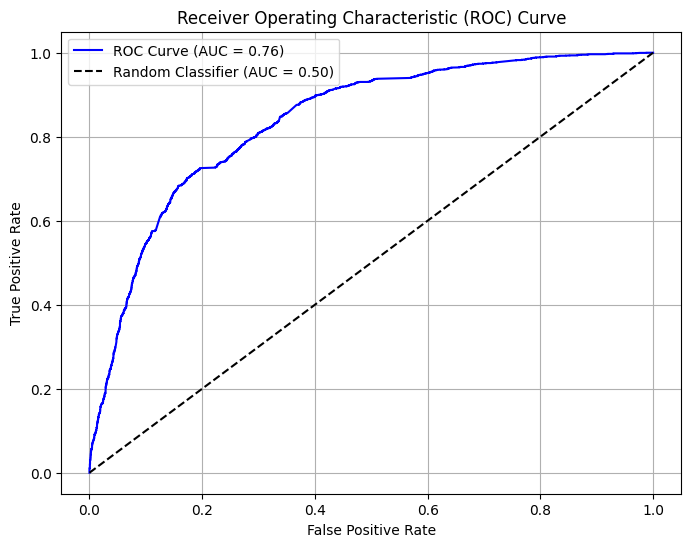

In [87]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.2f})", color="blue")
plt.plot([0, 1], [0, 1], "k--", label="Random Classifier (AUC = 0.50)")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.legend()
plt.grid(True)
plt.show()

In [88]:
lead_scores = y_pred_proba * 100  # Scale probabilities to a range of 0–100
lead_score_df = pd.DataFrame({'Lead Score': lead_scores, 'Converted': y_test})
print("\nSample Lead Scores:")
print(lead_score_df.head())


Sample Lead Scores:
      Lead Score  Converted
2212   62.265124          0
3034   92.329445          1
4492   51.687858          0
5063   20.174673          0
7645   19.135494          0


In [89]:
lead_score_df = lead_score_df.sort_values(by='Lead Score', ascending=False)
lead_score_df.head()


,Lead Score,Converted
6712,99.738874,1
6565,99.597521,1
6434,99.576353,1
3032,99.459176,1
2601,99.362134,1


In [90]:

# Calculate conversion rate at different thresholds
thresholds = [50, 60, 70, 80, 90]
for threshold in thresholds:
    filtered_leads = lead_score_df[lead_score_df['Lead Score'] > threshold]
    conversion_rate = filtered_leads['Converted'].mean() * 100
    print(f"Threshold: {threshold}, Conversion Rate: {conversion_rate:.2f}%")

Threshold: 50, Conversion Rate: 74.09%
Threshold: 60, Conversion Rate: 78.17%
Threshold: 70, Conversion Rate: 79.82%
Threshold: 80, Conversion Rate: 80.93%
Threshold: 90, Conversion Rate: 86.09%


### ITERATING AGAIN

In [91]:
df2=df.drop('Lead Source',axis=1)
df2=df.drop('Lead Origin',axis=1)


In [92]:
x=df2.drop(['Converted'],axis=1)
y=df2['Converted']

In [93]:
# splitting data into training and testing sets
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.7,random_state=0)

In [94]:
columns = x_train.columns

In [95]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.fit_transform(x_test)


In [96]:
x_train=pd.DataFrame(x_train, columns=columns)

In [97]:
x_train.head()

,Lead Source,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,What is your current occupation,Tags,City,A free copy of Mastering The Interview,Last Notable Activity
0,0.000000,0.0,0.166667,0.148247,0.285714,0.294118,0.945946,0.388889,0.666667,0.538462,0.5,0.0,0.214286
1,0.111111,0.0,0.416667,0.567244,0.357143,0.705882,0.324324,0.000000,1.000000,0.961538,0.0,0.0,0.500000
2,0.000000,0.0,0.666667,0.079006,0.571429,0.294118,0.324324,0.000000,0.500000,0.730769,0.0,1.0,0.214286
3,0.111111,0.0,0.583333,0.676431,0.200000,0.294118,0.324324,0.722222,0.666667,0.730769,0.0,0.0,0.214286
4,0.111111,0.0,0.333333,0.037284,0.571429,0.705882,0.324324,0.055556,0.666667,0.538462,0.0,0.0,0.785714


In [98]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(x_train, y_train)


LogisticRegression()

In [99]:
from sklearn.feature_selection import RFE
rfe=RFE (estimator=model,n_features_to_select=15)
rfe=rfe.fit(x_train,y_train)

In [100]:
# Lets see which features are selected
list(zip(x_train.columns,rfe.support_,rfe.ranking_))

[('Lead Source', True, 1),
 ('Do Not Email', True, 1),
 ('TotalVisits', True, 1),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', True, 1),
 ('Last Activity', True, 1),
 ('Country', True, 1),
 ('Specialization', True, 1),
 ('What is your current occupation', True, 1),
 ('Tags', True, 1),
 ('City', True, 1),
 ('A free copy of Mastering The Interview', True, 1),
 ('Last Notable Activity', True, 1)]

In [101]:
from operator import itemgetter
features = x_train.columns.to_list()
for x,y in (sorted(zip(rfe.ranking_,features),key=itemgetter(0))):
  print(x,y)

1 Lead Source
1 Do Not Email
1 TotalVisits
1 Total Time Spent on Website
1 Page Views Per Visit
1 Last Activity
1 Country
1 Specialization
1 What is your current occupation
1 Tags
1 City
1 A free copy of Mastering The Interview
1 Last Notable Activity


In [102]:
# select only those columns which have been selected by RFE
col=x_train.columns[rfe.support_]

In [103]:
x_train=x_train[col]

In [104]:
x_train.shape

(2772, 13)

In [105]:
# fit a logistic regression model on x_train after adding a constant and output the summary
import statsmodels.api as sm

In [106]:
# Ensuring x_train and y_train have matching indices
x_train, y_train = x_train.align(y_train, join='inner', axis=0)
# Adding constant to the independent variables
x_train_sm = sm.add_constant(x_train)

logm2=sm.GLM(y_train,x_train_sm,family=sm.families.Binomial())
res=logm2.fit()
res.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                  827
Model:                            GLM   Df Residuals:                      813
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -538.66
Date:                Tue, 28 Jan 2025   Deviance:                       1077.3
Time:                        17:07:24   Pearson chi2:                     826.
No. Iterations:                     4   Pseudo R-squ. (CS):            0.02367
Covariance Type:            nonrobust                                         
==========================================================================================================
                                             coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
const                                     -0.1081      0.539     -0.200      0.841      -1.165       0.949
Lead Source                                0.1749      0.508      0.344      0.731      -0.821       1.171
Do Not Email                              -0.4278      0.295     -1.450      0.147      -1.006       0.151
TotalVisits                               -0.5222      0.551     -0.948      0.343      -1.601       0.557
Total Time Spent on Website               -0.2475      0.350     -0.707      0.480      -0.933       0.439
Page Views Per Visit                       0.3111      0.475      0.655      0.513      -0.620       1.242
Last Activity                              0.6995      0.482      1.450      0.147      -0.246       1.645
Country                                   -0.5514      0.393     -1.403      0.161      -1.321       0.219
Specialization                            -0.4705      0.282     -1.671      0.095      -1.023       0.081
What is your current occupation            0.0585      0.547      0.107      0.915      -1.014       1.131
Tags                                       0.0929      0.285      0.326      0.744      -0.465       0.651
City                                       0.5646      0.237      2.382      0.017       0.100       1.029
A free copy of Mastering The Interview    -0.2714      0.193     -1.409      0.159      -0.649       0.106
Last Notable Activity                     -0.7634      0.480     -1.590      0.112      -1.705       0.178
==========================================================================================================
"""

In [107]:
# calculate VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif=pd.DataFrame()
vif['Features']=x_train.columns
vif['VIF']=[variance_inflation_factor(x_train.values,i) for i in range(x_train.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
8,What is your current occupation,20.27
12,Last Notable Activity,11.06
5,Last Activity,10.95
6,Country,8.37
9,Tags,8.26
7,Specialization,7.42
4,Page Views Per Visit,5.92
2,TotalVisits,5.30
10,City,4.90
0,Lead Source,3.22


In [108]:
y_train_pred=res.predict(sm.add_constant(x_train))
y_train_pred[:10]

,0
0,0.393177
13,0.406052
19,0.454211
21,0.318107
25,0.427053
26,0.361726
27,0.379934
28,0.329840
35,0.423828
40,0.435281


In [109]:
y_pred = model.predict(x_test)

In [110]:
y_pred_proba = model.predict_proba(x_test)[:, 1]

In [111]:
from sklearn.metrics import confusion_matrix

In [112]:
predictions = rfe.predict(x_test)
confusion_matrix(y_test,predictions)

array([[3337,  616],
       [ 839, 1676]])

In [113]:
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
)


In [114]:
accuracy = accuracy_score(y_test, predictions)
precision = precision_score(y_test, predictions)
recall = recall_score(y_test, predictions)
f1 = f1_score(y_test, predictions)
roc_auc = roc_auc_score(y_test, predictions)


In [115]:
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
print(f"ROC AUC Score: {roc_auc:.2f}")

Accuracy: 0.78
Precision: 0.73
Recall: 0.67
F1 Score: 0.70
ROC AUC Score: 0.76


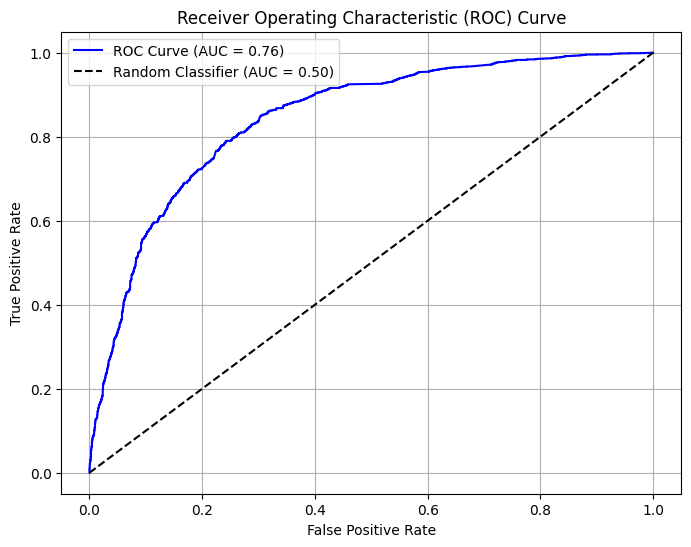

In [116]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.2f})", color="blue")
plt.plot([0, 1], [0, 1], "k--", label="Random Classifier (AUC = 0.50)")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.legend()
plt.grid(True)
plt.show()

In [117]:
lead_scores = y_pred_proba * 100  # Scale probabilities to a range of 0–100
lead_score_df = pd.DataFrame({'Lead Score': lead_scores, 'Converted': y_test})
print("\nSample Lead Scores:")
print(lead_score_df.head())


Sample Lead Scores:
      Lead Score  Converted
2212   70.595128          0
3034   88.063169          1
4492   64.254037          0
5063   30.086189          0
7645   21.674872          0


In [118]:
lead_score_df = lead_score_df.sort_values(by='Lead Score', ascending=False)
lead_score_df.head()


,Lead Score,Converted
6565,99.655460,1
6712,99.434439,1
2601,99.390724,1
3032,99.342301,1
6434,99.254854,1


In [119]:
# Calculate conversion rate at different thresholds
thresholds = [50, 60, 70, 80, 90]
for threshold in thresholds:
    filtered_leads = lead_score_df[lead_score_df['Lead Score'] > threshold]
    conversion_rate = filtered_leads['Converted'].mean() * 100
    print(f"Threshold: {threshold}, Conversion Rate: {conversion_rate:.2f}%")

Threshold: 50, Conversion Rate: 73.12%
Threshold: 60, Conversion Rate: 78.34%
Threshold: 70, Conversion Rate: 80.78%
Threshold: 80, Conversion Rate: 82.75%
Threshold: 90, Conversion Rate: 88.04%


THUS WE SEE THAT THE MODEL'S PERFORMANCE IS REDUCING WITH EACH ITERATION. THEREFORE WE WILL PROCEED WITH THE FIRST MODEL.

# First model metrics obtained

# Accuracy: 0.78
# Precision: 0.74
# Recall: 0.66
# F1 Score: 0.70
# ROC AUC Score: 0.76

# First model lead scores and conversion rates obtained.
# Threshold: 50, Conversion Rate: 74.19%
# Threshold: 60, Conversion Rate: 78.88%
# Threshold: 66, Conversion Rate: 79.83%
# Threshold: 70, Conversion Rate: 81.27%
# Threshold: 80, Conversion Rate: 83.01%
# Threshold: 90, Conversion Rate: 90.46%

The sales team should target and call only those leads whose lead score is above 66(in first model). They will then achieve a conversion rate of 80%, which will be in accordance with the ballpark given by the CEO